<a href="https://colab.research.google.com/github/Jin0331/TA/blob/master/DS_Lab_11(2)_ggplot2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *11주차 실습 - *

- - -

```
Grammar of Graphics
일단 ggplot2의 철학(?)을 알아야 한다.

gg는 grammar of graphics의 약자다. 

그리고 이 문법은 다음과 같은 요소를 갖고 있다.

data : 시각화하려는 데이터 또는 실제 정보를 의미한다.
geometries : (줄여서 ‘geoms‘로 쓰기도 하는데) 데이터를 표현하는 도형을 의미한다. 산점도의 점, 그래프의 막대나 선 등. 데이터를 “매핑”하는 모양이라 할 수 있다.
aesthetics : 축의 스케일, 색상, 채우기 등 미학적/시각적 속성을 의미한다.
이 세 가지 요소 외에도 layer의 개념을 기억하면 좋다. ggplot2는 빈 캔버스에 geoms을 추가하고, 다른 요소들을 레이어로 얹어서 플롯을 완성하는 방식이기 때문에.

출처 : http://hleecaster.com/r-ggplot2-data-visualization/
출처 : http://stulp.gmw.rug.nl/21-03-2019/ggplotworkshop/ggplottheory.html
```

<center><img src="https://mblogthumb-phinf.pstatic.net/MjAxNzEwMjVfMjE5/MDAxNTA4ODg4MjY2MTk0.BZoMvCbkuMbw_Ywmi1fAyjonED-3tGQpat76O03diZYg.Al1ZXP7FEtexxtMHfKuJb2Gb_ZKPdWB69k_eHm-HBGkg.PNG.definitice/image.png?type=w800" width="500" height="300"></center>





In [ ]:
install.packages("data.table")
library(tidyverse)
library(data.table)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



###(1) **데이터 로드 및 데이터 구조 파악(str)**

In [ ]:
DF <- fread("ftp://210.115.229.94/2020_datascience/6th_data/Regular_Season_Batter.csv") %>% as_tibble()

In [ ]:
DF %>% show()

# A tibble: 2,454 x 29
   batter_id batter_name  year team    avg     G    AB     R     H  `2B`  `3B`
       <int> <chr>       <int> <chr> <dbl> <int> <int> <int> <int> <int> <int>
 1         0 가르시아     2018 LG    0.339    50   183    27    62     9     0
 2         1 강경학       2011 한화  0         2     1     0     0     0     0
 3         1 강경학       2014 한화  0.221    41    86    11    19     2     3
 4         1 강경학       2015 한화  0.257   120   311    50    80     7     4
 5         1 강경학       2016 한화  0.158    46   101    16    16     3     2
 6         1 강경학       2017 한화  0.214    59    84    17    18     2     1
 7         1 강경학       2018 한화  0.278    77   245    42    68    11     1
 8         2 강구성       2013 NC    0         2     2     0     0     0     0
 9         2 강구성       2015 NC    0.2       4     5     0     1     1     0
10         2 강구성       2016 NC    0         2     3     0     0     0     0
# … with 2,444 more rows, and 18 more variables: HR <int>, TB <int>, RBI

In [ ]:
DF %>% str()

tibble [2,454 × 29] (S3: tbl_df/tbl/data.frame)
 $ batter_id      : int [1:2454] 0 1 1 1 1 1 1 2 2 2 ...
 $ batter_name    : chr [1:2454] "가르시아" "강경학" "강경학" "강경학" ...
 $ year           : int [1:2454] 2018 2011 2014 2015 2016 2017 2018 2013 2015 2016 ...
 $ team           : chr [1:2454] "LG" "한화" "한화" "한화" ...
 $ avg            : num [1:2454] 0.339 0 0.221 0.257 0.158 0.214 0.278 0 0.2 0 ...
 $ G              : int [1:2454] 50 2 41 120 46 59 77 2 4 2 ...
 $ AB             : int [1:2454] 183 1 86 311 101 84 245 2 5 3 ...
 $ R              : int [1:2454] 27 0 11 50 16 17 42 0 0 0 ...
 $ H              : int [1:2454] 62 0 19 80 16 18 68 0 1 0 ...
 $ 2B             : int [1:2454] 9 0 2 7 3 2 11 0 1 0 ...
 $ 3B             : int [1:2454] 0 0 3 4 2 1 1 0 0 0 ...
 $ HR             : int [1:2454] 8 0 1 2 1 0 5 0 0 0 ...
 $ TB             : int [1:2454] 95 0 30 101 26 22 96 0 2 0 ...
 $ RBI            : int [1:2454] 34 0 7 27 7 4 27 0 0 0 ...
 $ SB             : int [1:2454] 5 0 0 4 0 1 6 0 0 0 

<br>

###(2) **Run ggplot2**

https://ggplot2.tidyverse.org/reference/

- - -

```
<Required>
ggplot(data = <데이터프레임>, aes(x = x축, y축)) + 
 geom_*  (point, bar, line, histogram, boxplot ...)

```

```
<aes(aesthetic)>
  1) x: X축 

  2) y: Y축

  3) color: 그래프의 색깔, 모양일 경우 테두리

  4) fill: 채우는 색깔

  5) size: 라이읜 굵기 또는 점의 크기

  6) alpha: 투명도 

  7) linetype: 선 패턴

  8) labels: 표나 축의 텍스트

  출처 : https://tariat.tistory.com/669
```

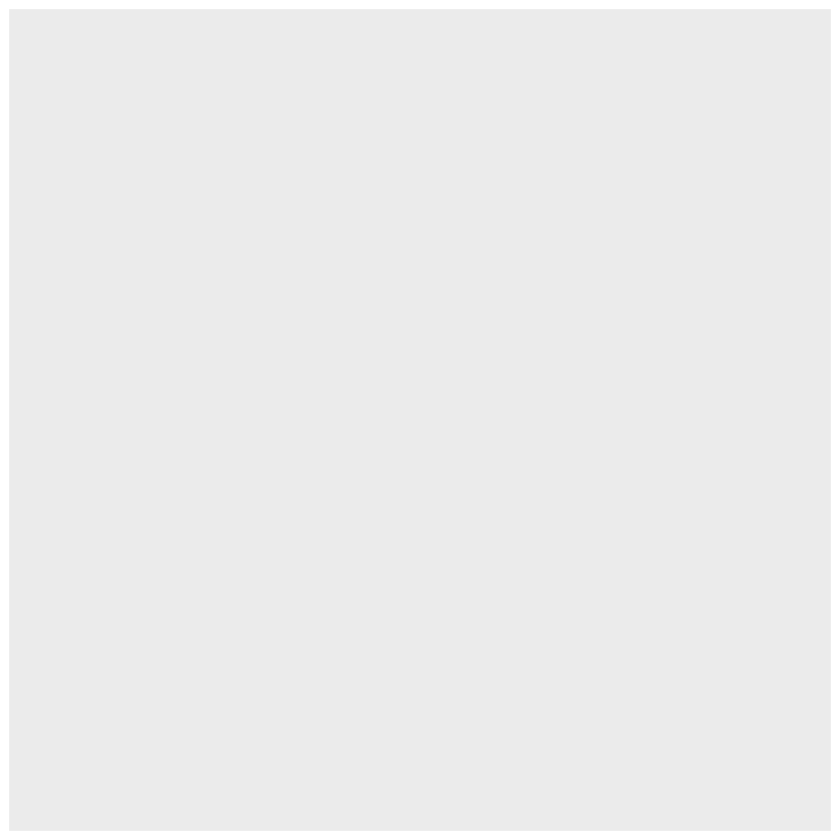

In [ ]:
ggplot()

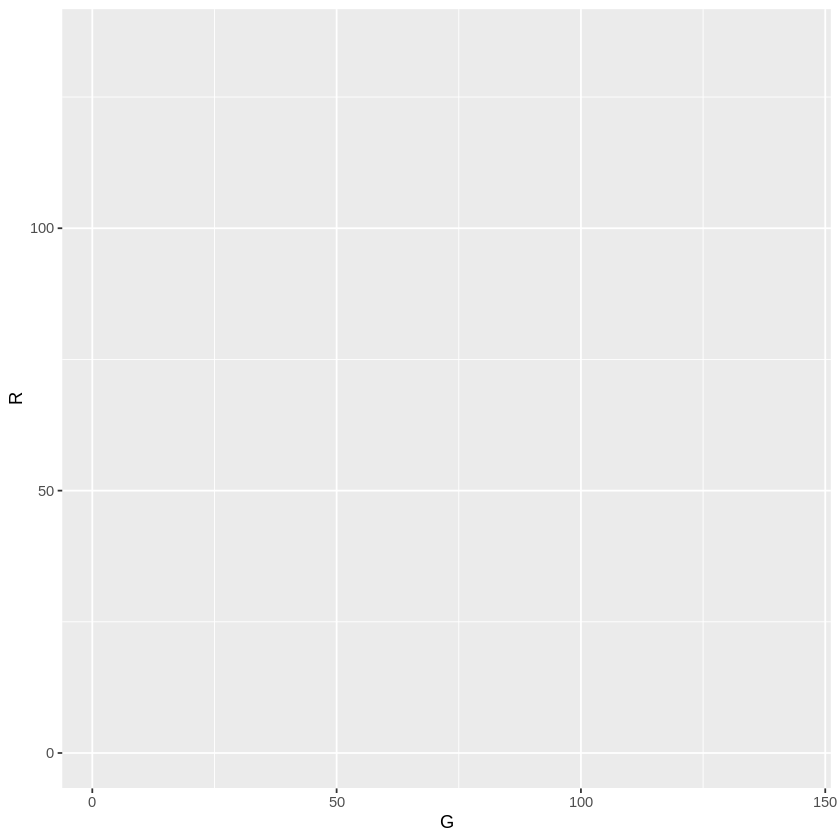

In [ ]:
ggplot(DF, aes(x = G, y = R))

#### **A. geom_point()** 

---

https://ggplot2.tidyverse.org/reference/geom_point.html



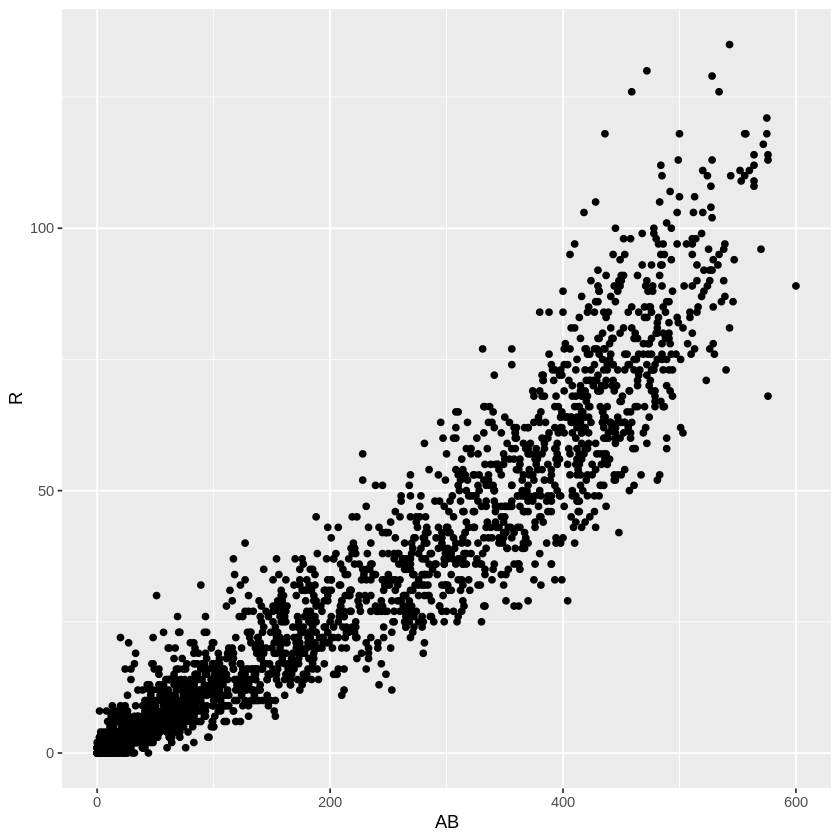

In [ ]:
# geom_point()
# https://ggplot2.tidyverse.org/reference/geom_point.html
# AB(타수), R(득점수)
ggplot(DF, aes(x = AB, y = R)) +
 geom_point()

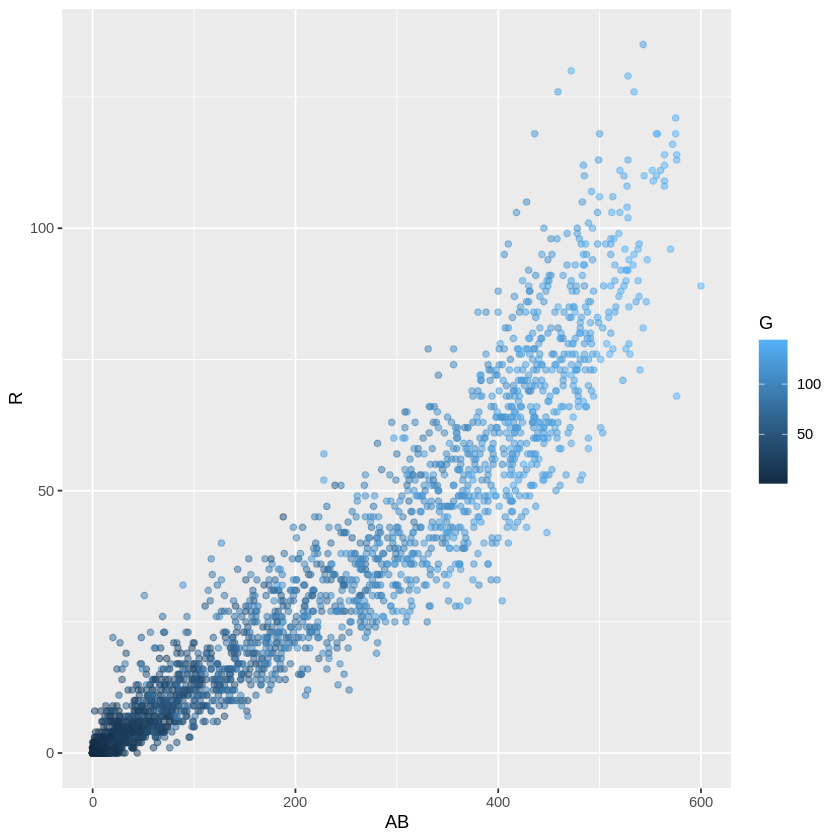

In [ ]:
# geom_point()
# aes(color, alpha)
ggplot(data = DF, aes(x = AB, y = R, color = G)) +
 geom_point(alpha = 0.5)

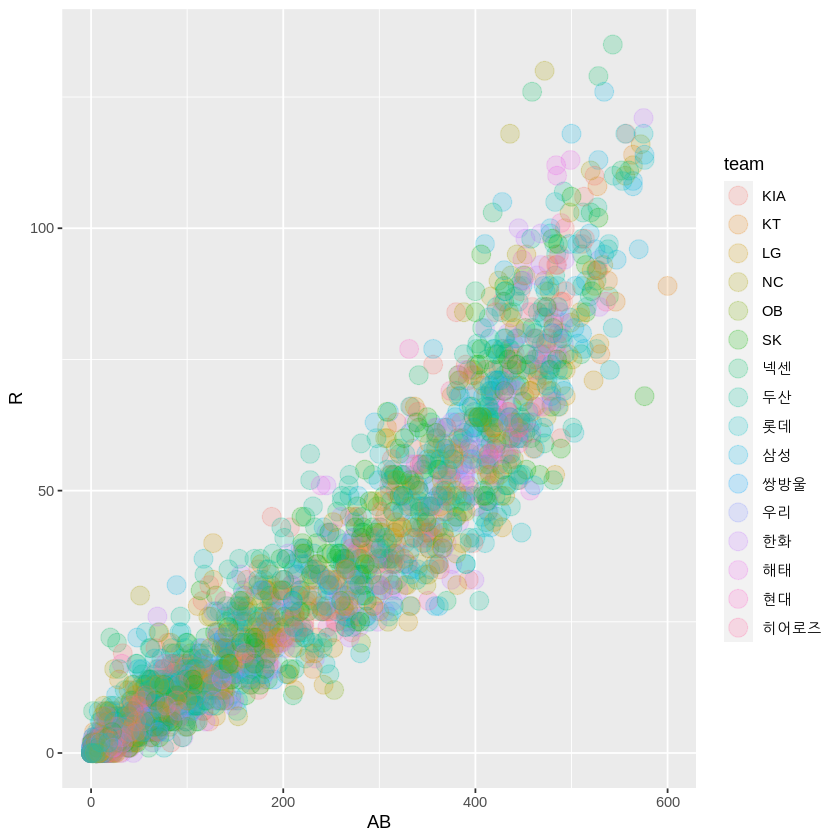

In [ ]:
# geom_point()
# aes(color)
ggplot(data = DF, aes(x = AB, y = R, color = team)) +
 geom_point(alpha = 2/10, size = 5)

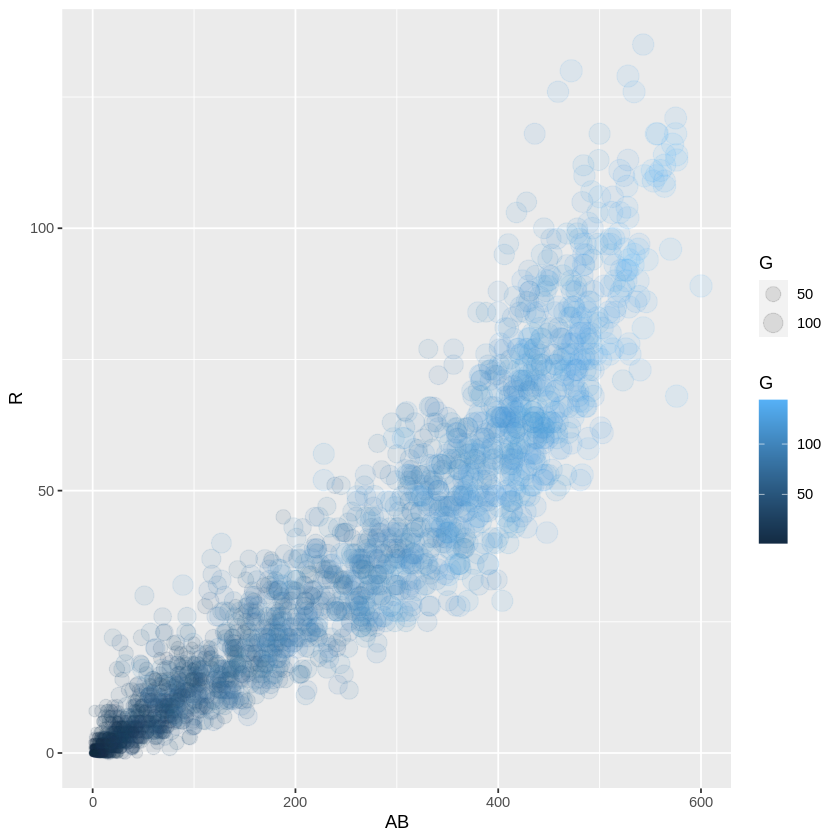

In [ ]:
# geom_point()
# aes(size)
ggplot(data = DF, aes(x = AB, y = R, color = G, size = G)) +
 geom_point(alpha = 1/10)

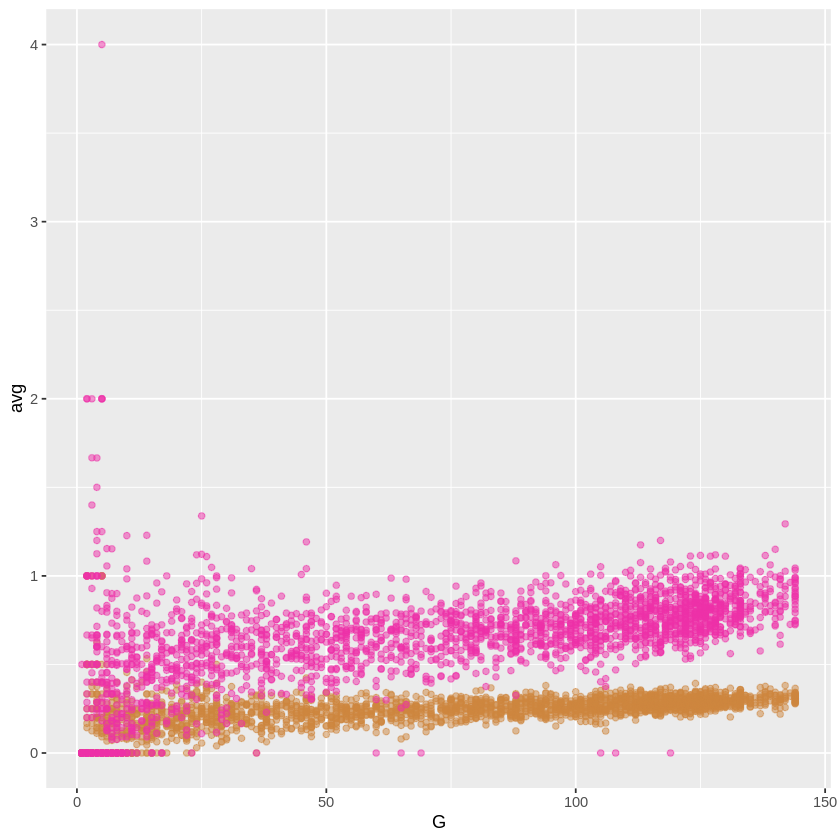

In [ ]:
# geom_point()
# 다른방법
ggplot() +
 geom_point(data = DF, aes(x = G, y = avg), colour = "tan3", alpha = 0.5) +
 geom_point(data = DF, aes(x = G, y = OPS), colour = "maroon2", alpha = 0.5)

#### **B. geom_bar()**

---

https://ggplot2.tidyverse.org/reference/geom_bar.html

In [ ]:
# team별 R(득점수)와 H(안타수)의 합
team_R_H_sum <- DF %>% group_by(team) %>% 
 summarise(R_SUM = sum(R, na.rm = T), H_SUM = sum(H, na.rm = T))
team_R_H_sum %>% show()

# A tibble: 16 x 3
   team     R_SUM H_SUM
   <chr>    <int> <int>
 1 KIA       7833 14451
 2 KT        2325  4650
 3 LG        7669 14960
 4 NC        3819  6749
 5 OB         102   257
 6 SK        8145 15105
 7 넥센      5847 10508
 8 두산      9689 17891
 9 롯데      8120 15629
10 삼성      8433 15509
11 쌍방울      14    49
12 우리       281   610
13 한화      7776 15046
14 해태       882  1519
15 현대      2102  3837
16 히어로즈   368   625


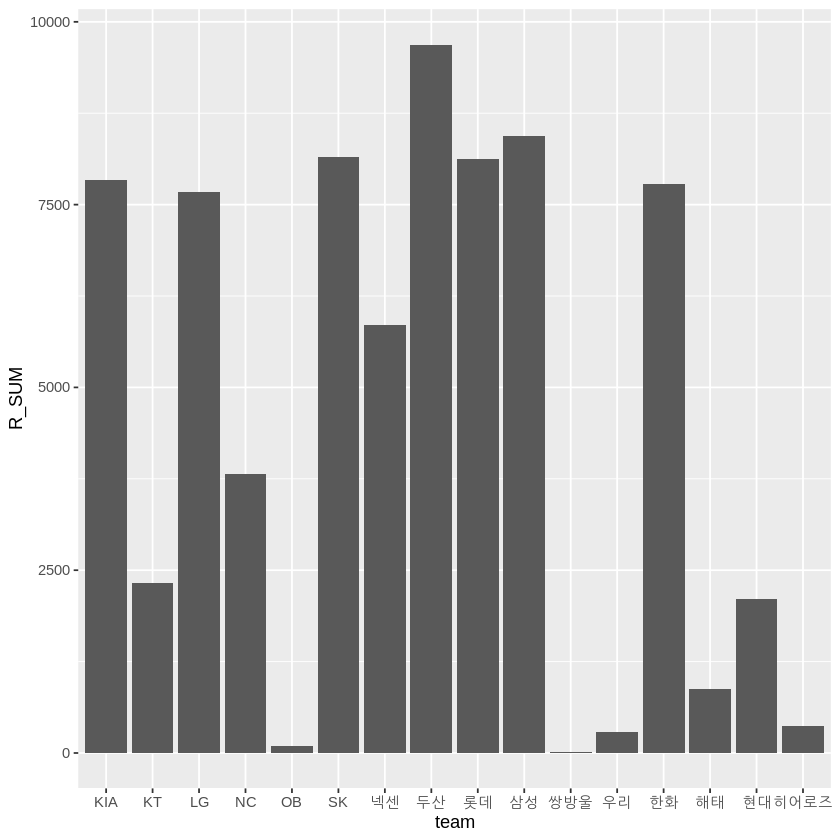

In [ ]:
g <- ggplot(data = team_R_H_sum, aes(x = team, y = R_SUM)) 
g + geom_bar(stat = "identity")

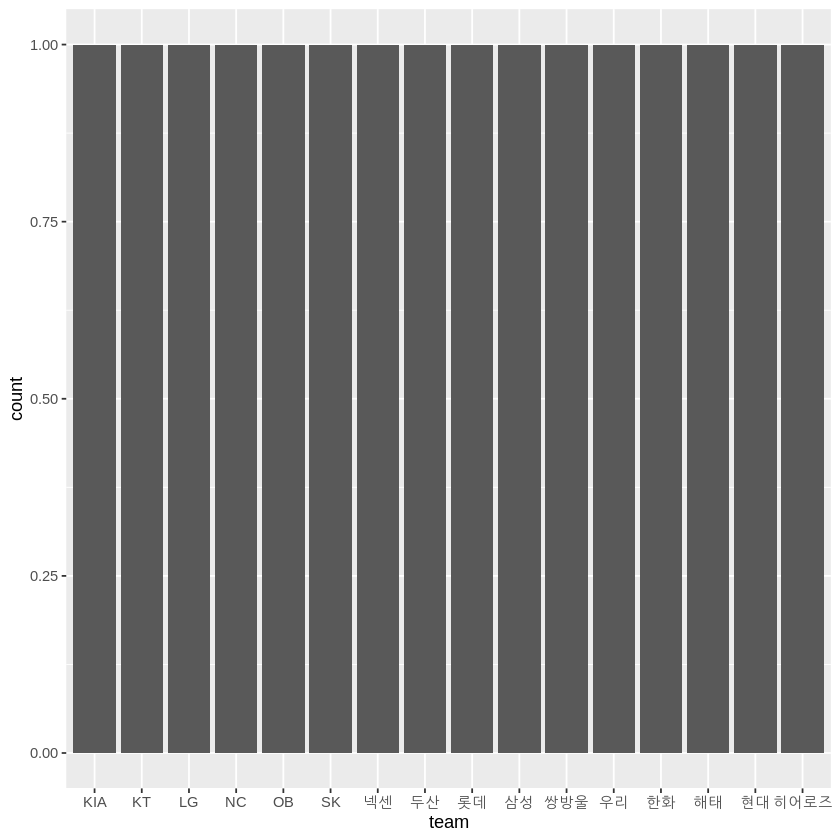

In [ ]:
ggplot(data = team_R_H_sum, aes(x = team))
 + geom_bar()

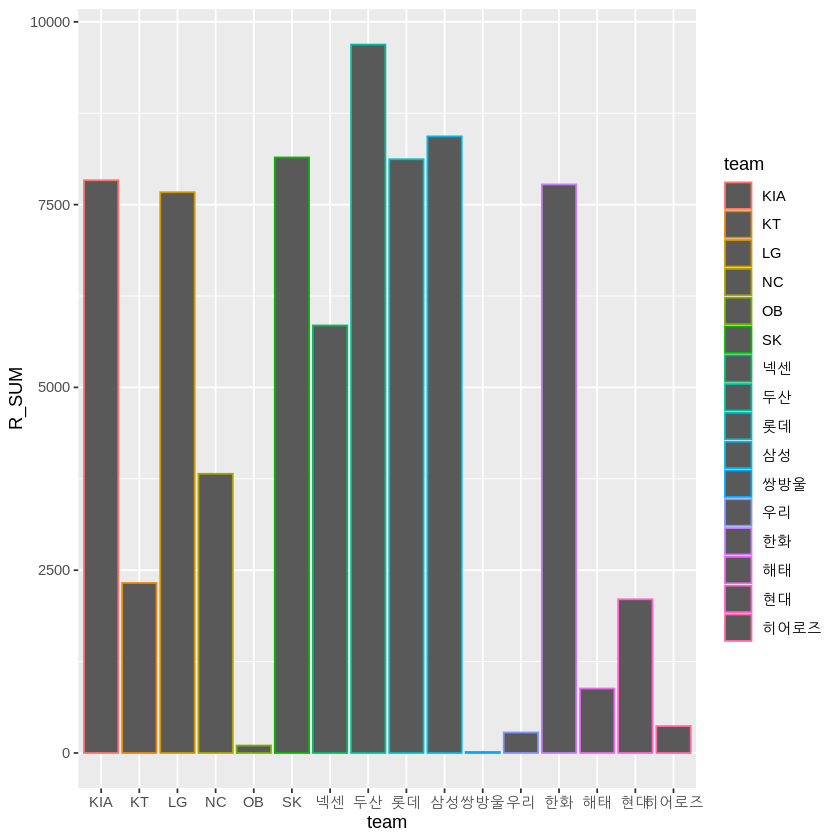

In [ ]:
# color
g + geom_bar(stat = "identity", aes(color = team))
# aes에서 data를 따로 정의하지 않는 이상, 이전에 설정된 data를 그대로 사용한다.

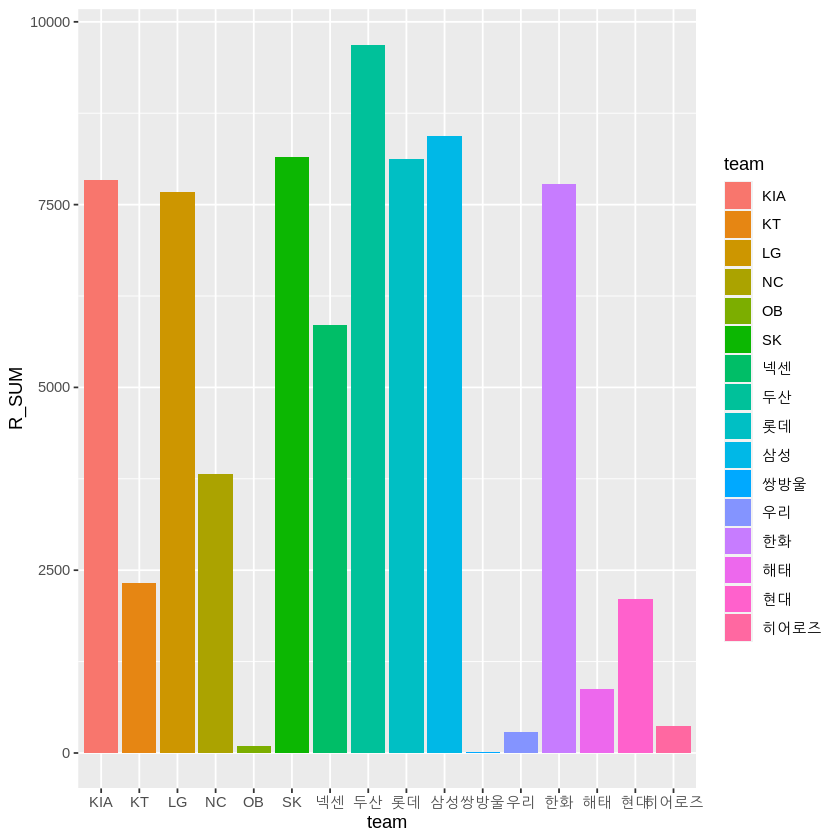

In [ ]:
# fill
g + geom_bar(stat = "identity", aes(fill = team))

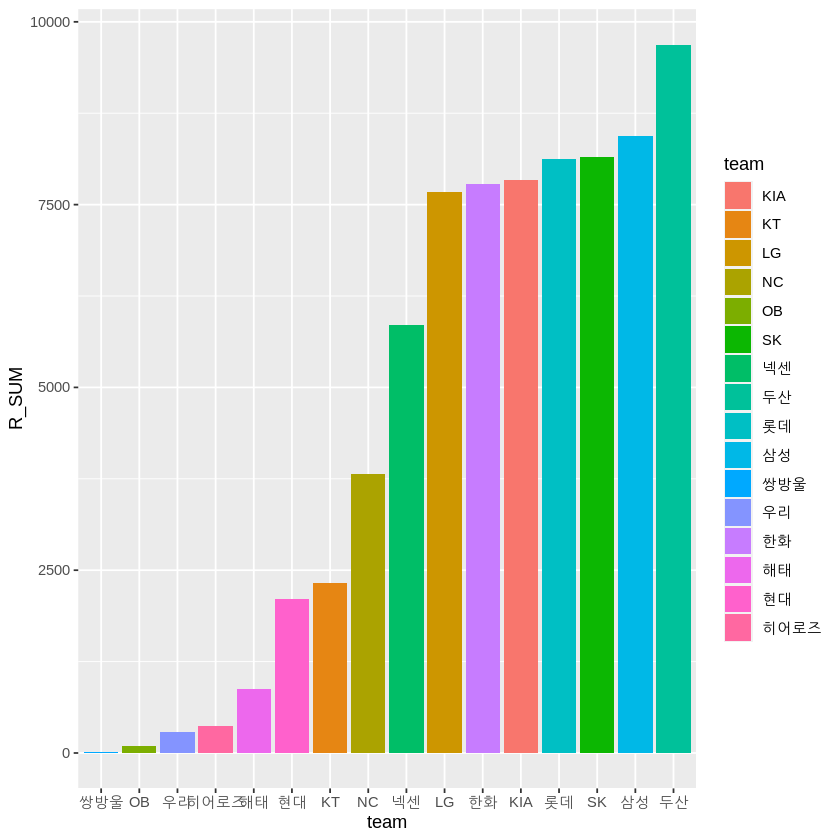

In [ ]:
# reorder
g + geom_bar(stat = "identity", aes(reorder(team, R_SUM), fill = team))

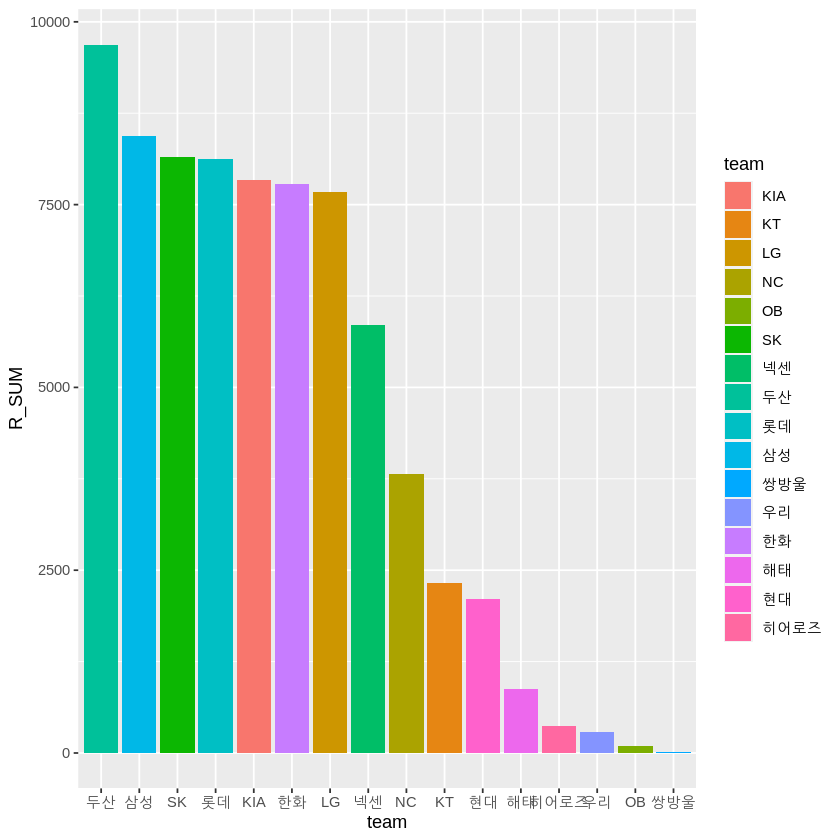

In [ ]:
# reorder
g + geom_bar(stat = "identity", aes(reorder(team, -R_SUM), fill = team))

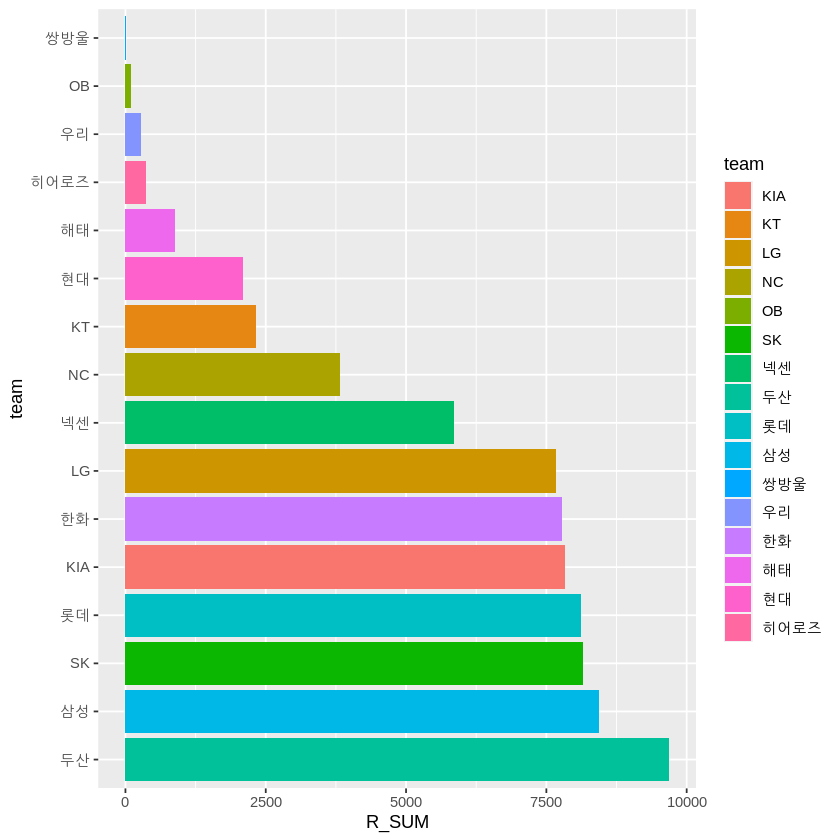

In [ ]:
# coord_flip()
g + geom_bar(stat = "identity", aes(reorder(team, -R_SUM), fill = team))+
 coord_flip()

#### **C. geom_histogram(), geom_boxplot()**

---
https://ggplot2.tidyverse.org/reference/geom_histogram.html

https://ggplot2.tidyverse.org/reference/geom_boxplot.html

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



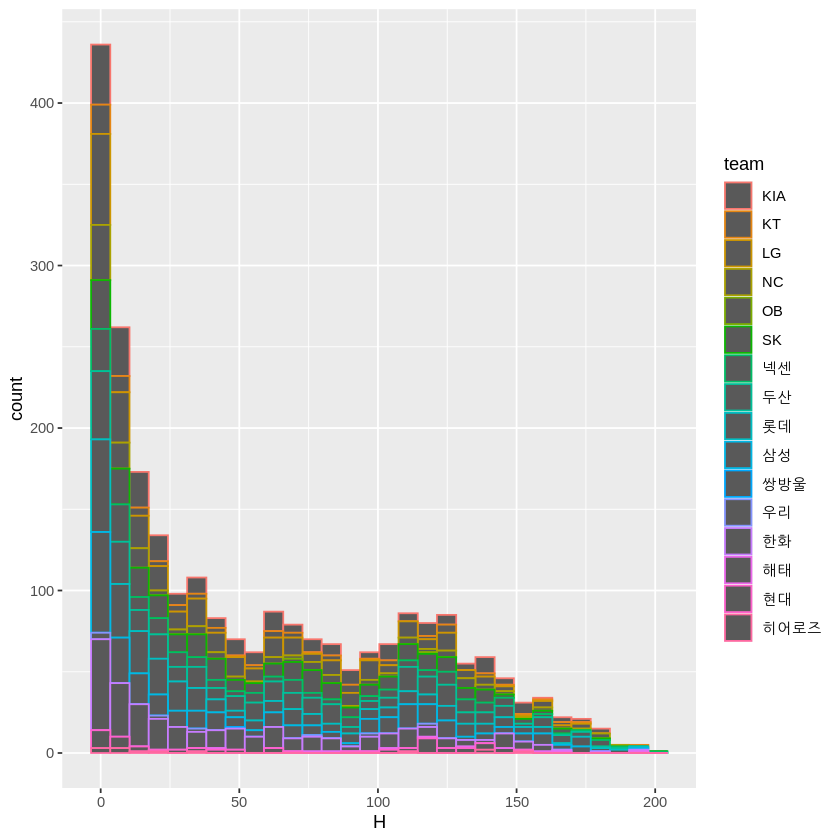

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, color = team)) 
 + geom_histogram()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



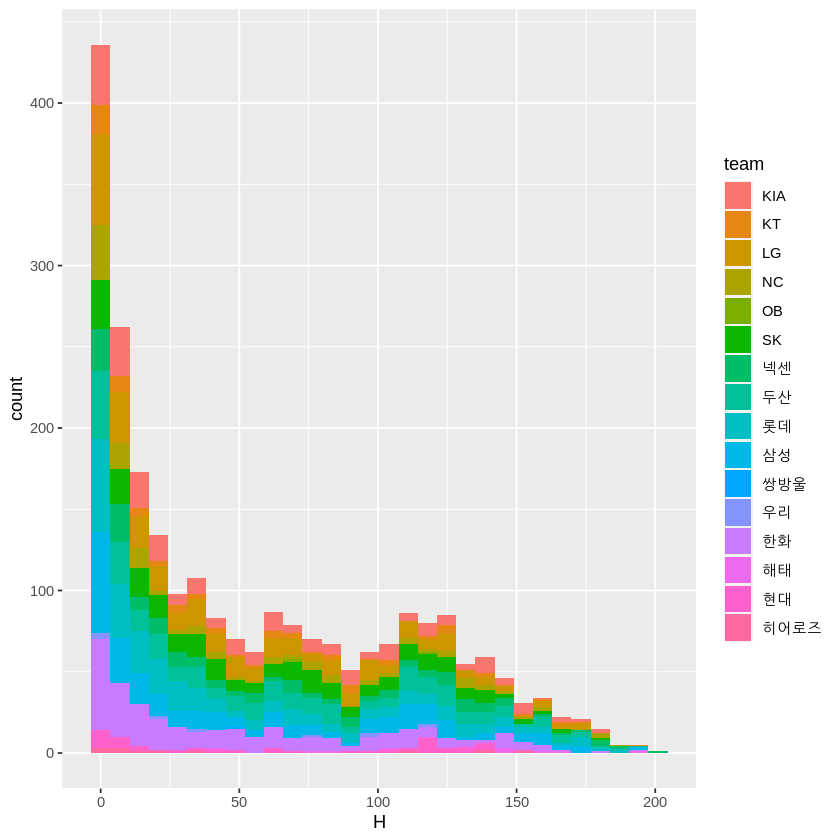

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram()

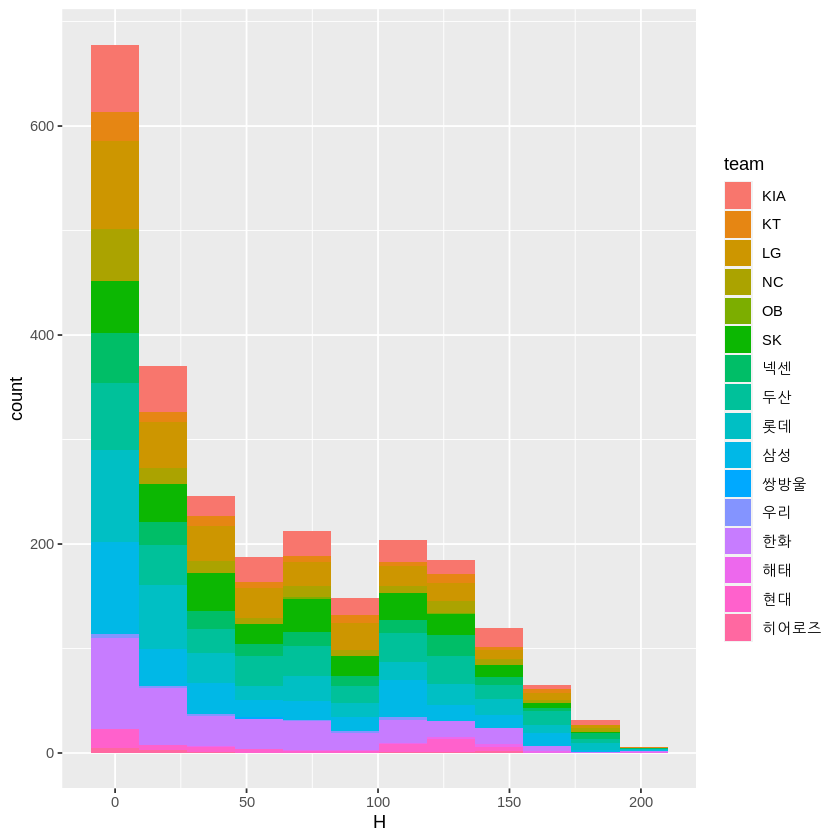

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(bins = 12)

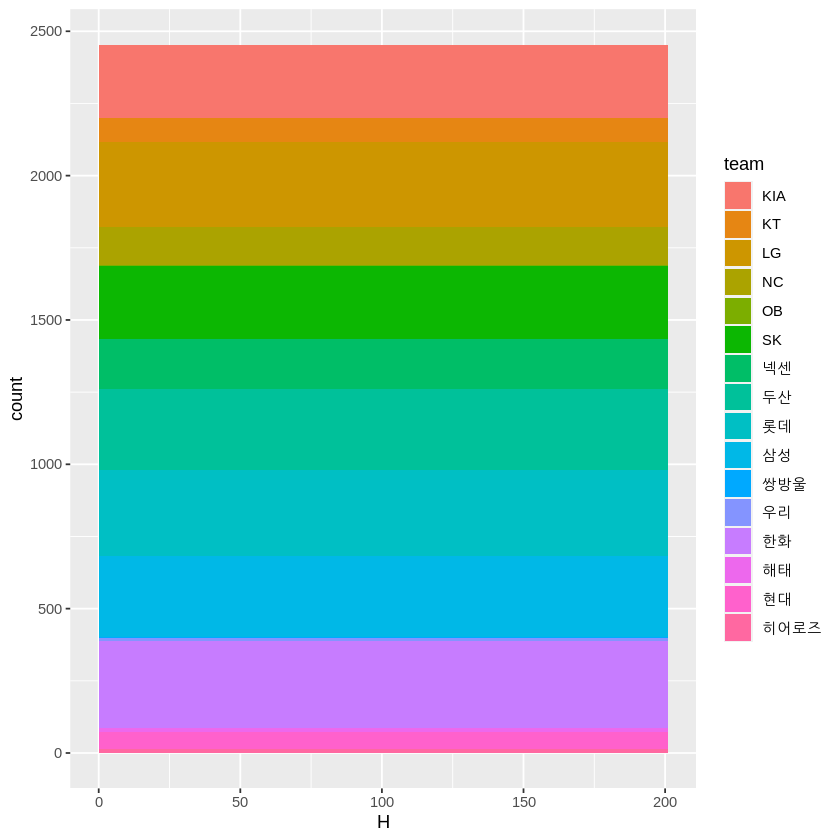

In [ ]:
# geom_histgram
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(bins = 1)

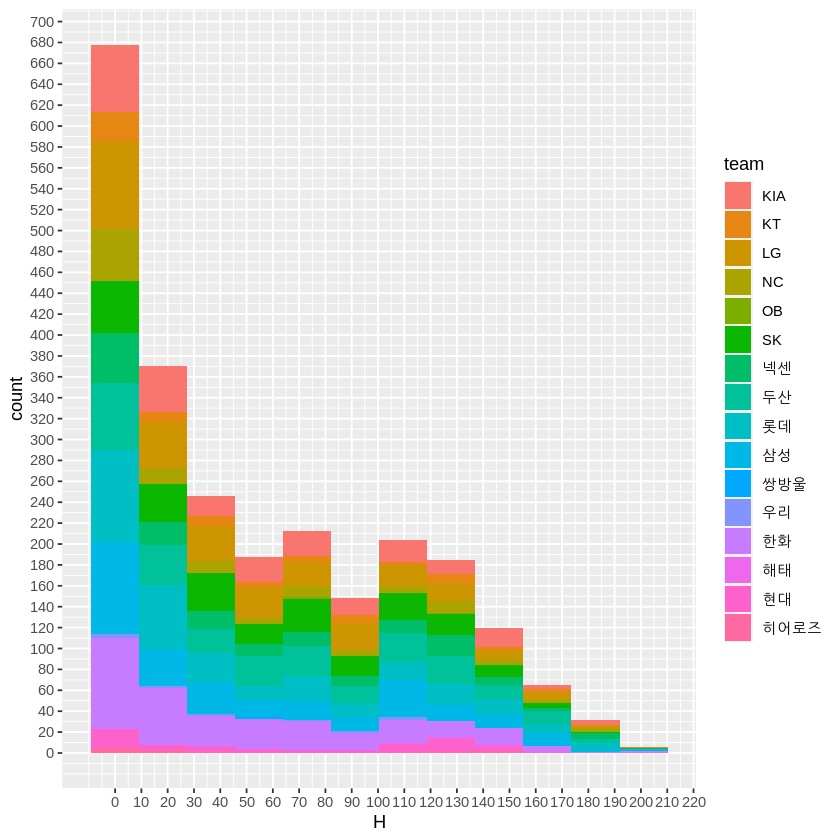

In [ ]:
# scale_xy_continuous
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(bins = 12) +
 scale_x_continuous(breaks = seq(0, 220, 10)) + 
 scale_y_continuous(breaks = seq(0, 800, 20))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



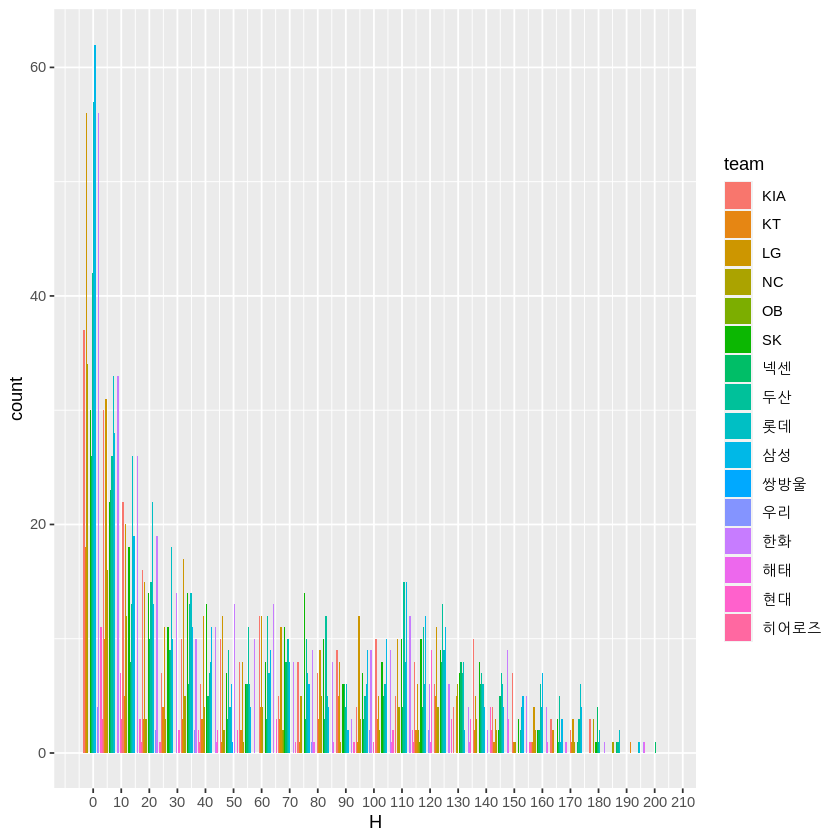

In [ ]:
# position = "dodge"
DF %>% ggplot(aes(H, fill = team)) +
 geom_histogram(position = "dodge") +
 scale_x_continuous(breaks = seq(0, 220, 10)) + 
 scale_y_continuous(breaks = seq(0, 800, 20))

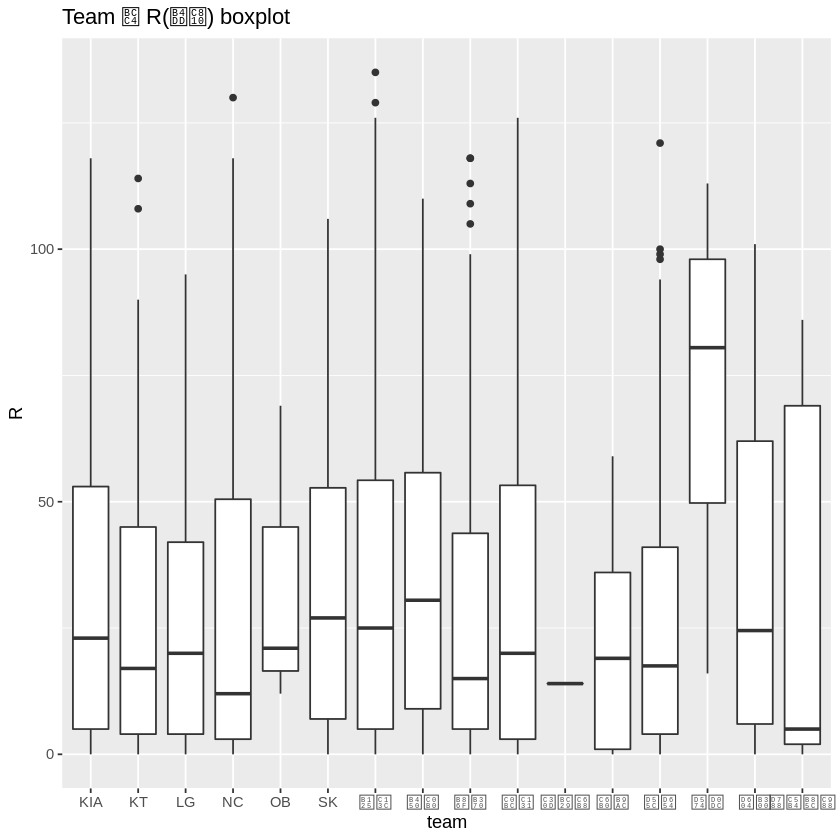

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R)) +
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot")

#### **D. extrafont, theme를 이용해서한글을 제대로 출력해보자!!!!**

---

https://ggplot2.tidyverse.org/reference/theme.html

In [ ]:
# google colab(Ubuntu) 만 해당(Window, Mac 유저는 이 부분 실행하면 오류 발생, 배달의 민족 폰트 : https://www.woowahan.com/#/fonts)
system("sudo apt-get install fonts-nanum-coding")
#/usr/share/fonts/truetpye/nanum"

In [ ]:
install.packages("extrafont")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘extrafontdb’, ‘Rttf2pt1’




In [ ]:
library(extrafont)
options(warn = -1)
font_import(pattern = "Nanum")  # 또는 font_import() 전체.. 시간 오래걸림

fonts()

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n] y


Scanning ttf files in /usr/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf
 : NanumGothicCoding-Bold already registered in fonts database. Skipping.

/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
 : NanumGothicCoding already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /usr/local/lib/R/site-library/extrafontdb/metrics



[1] "NanumGothicCoding"

In [ ]:
fonts()[1]

[1] "NanumGothicCoding"

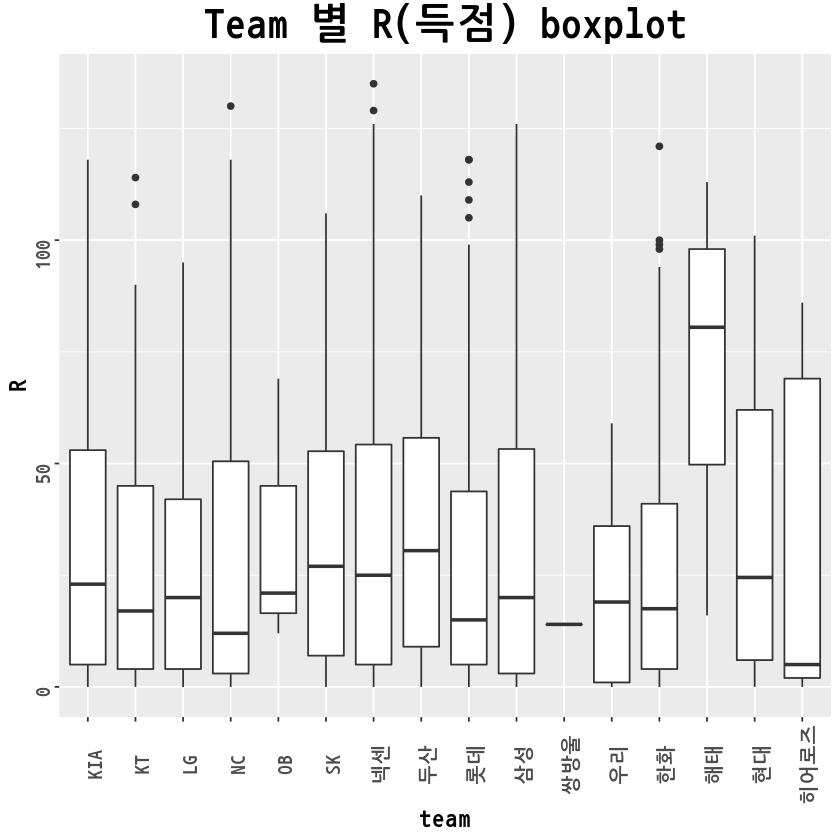

In [ ]:
# geom_boxplot
# http://blog.naver.com/nife0719/221000580841
DF %>% ggplot(aes(x = team, y = R)) +
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 15,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 15,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

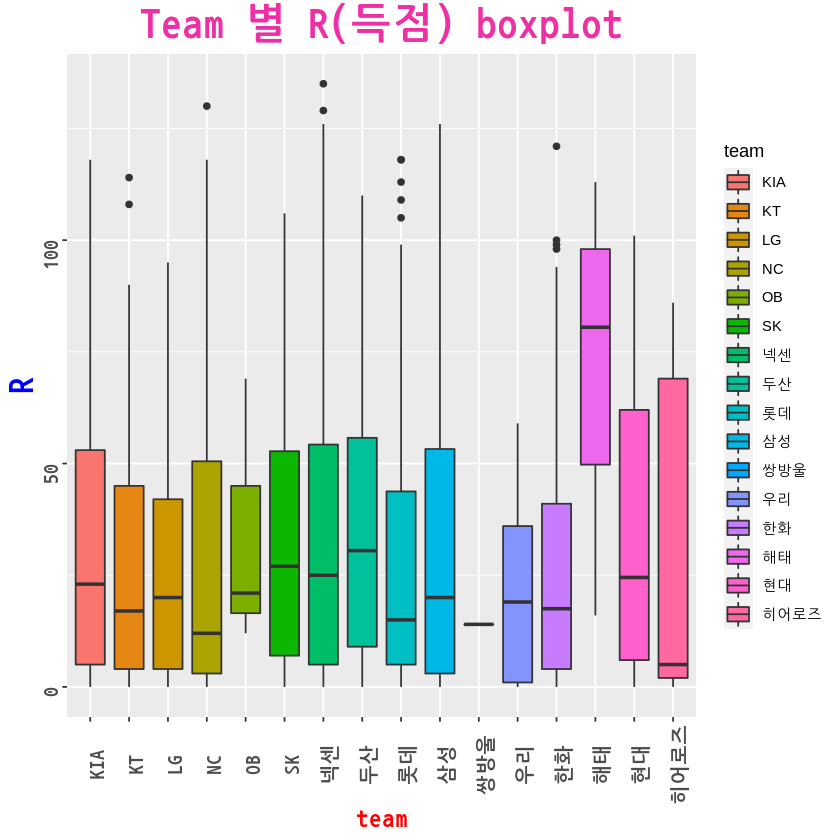

In [ ]:
# geom_boxplot
# http://blog.naver.com/nife0719/221000580841
DF %>% ggplot(aes(x = team, y = R, fill = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 15,face = "bold", color = "red"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold", color = "blue"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

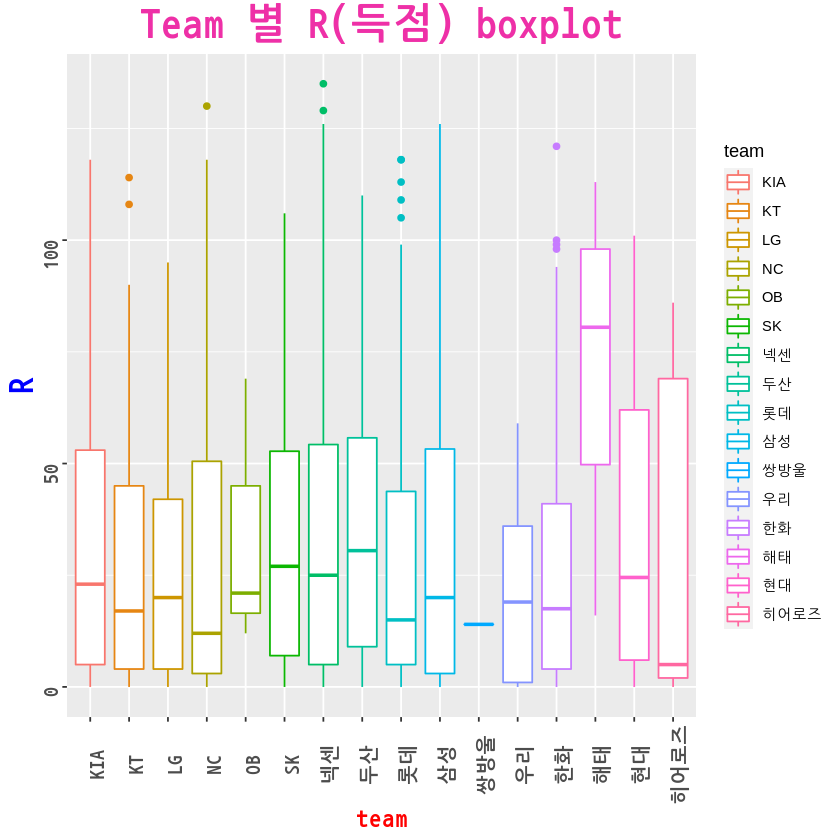

In [ ]:
# geom_boxplot
# http://blog.naver.com/nife0719/221000580841
DF %>% ggplot(aes(x = team, y = R, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 15,face = "bold", color = "red"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold", color = "blue"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

#### **F. RColorBrewer, scale_fill_brewer, scale_color_brewer**

---

https://ggplot2.tidyverse.org/reference/scale_brewer.html


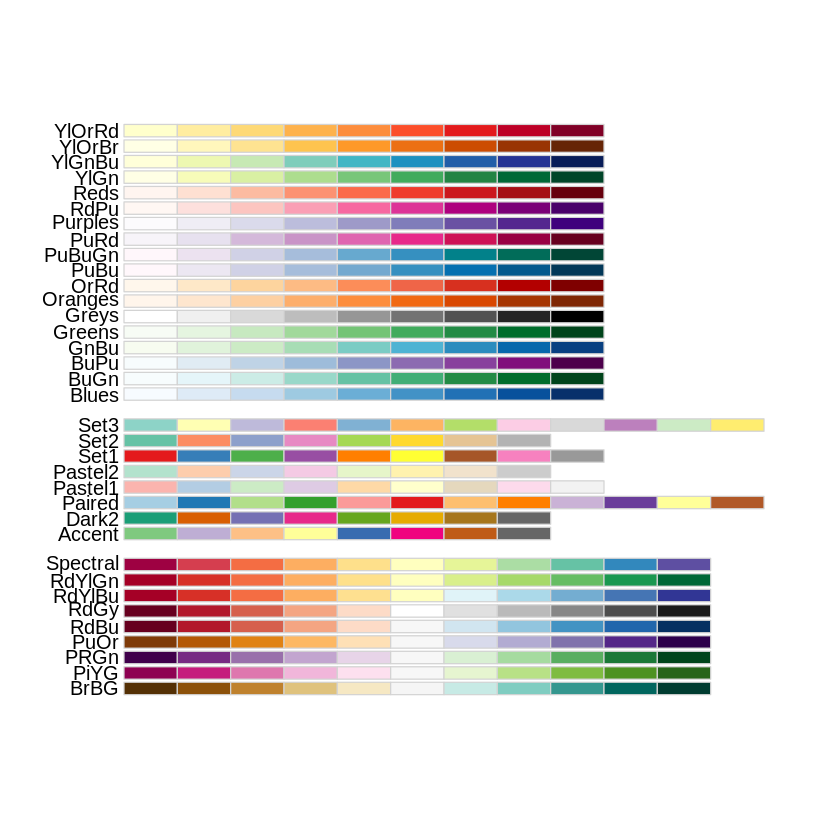

In [ ]:
library(RColorBrewer)
RColorBrewer::display.brewer.all()

In [ ]:
RColorBrewer::brewer.pal.info %>% show()

         maxcolors category colorblind
BrBG            11      div       TRUE
PiYG            11      div       TRUE
PRGn            11      div       TRUE
PuOr            11      div       TRUE
RdBu            11      div       TRUE
RdGy            11      div      FALSE
RdYlBu          11      div       TRUE
RdYlGn          11      div      FALSE
Spectral        11      div      FALSE
Accent           8     qual      FALSE
Dark2            8     qual       TRUE
Paired          12     qual       TRUE
Pastel1          9     qual      FALSE
Pastel2          8     qual      FALSE
Set1             9     qual      FALSE
Set2             8     qual       TRUE
Set3            12     qual      FALSE
Blues            9      seq       TRUE
BuGn             9      seq       TRUE
BuPu             9      seq       TRUE
GnBu             9      seq       TRUE
Greens           9      seq       TRUE
Greys            9      seq       TRUE
Oranges          9      seq       TRUE
OrRd             9      s

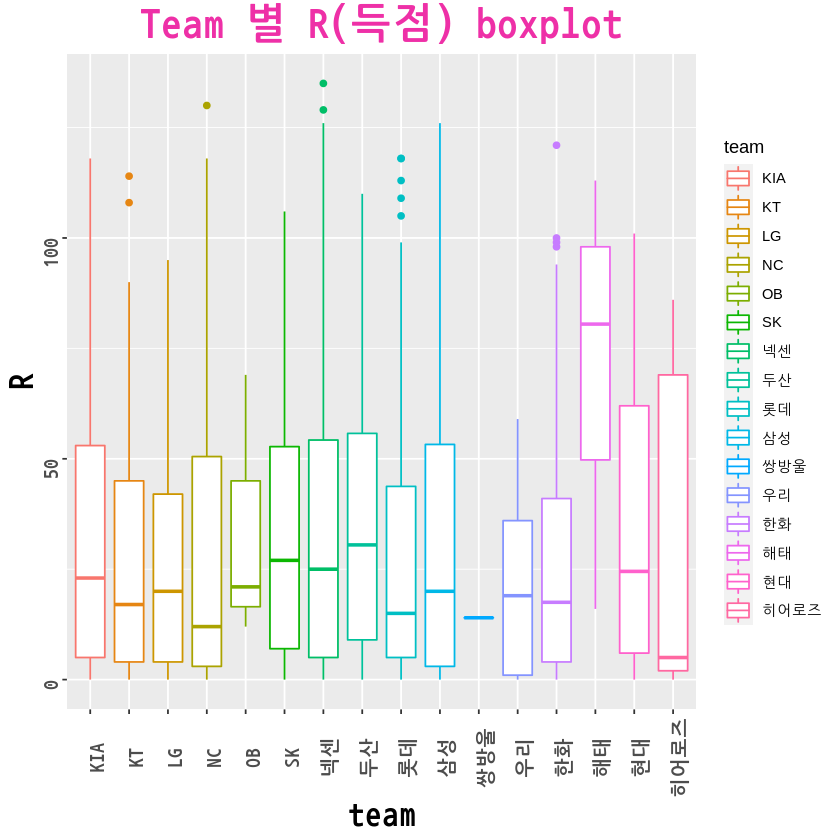

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

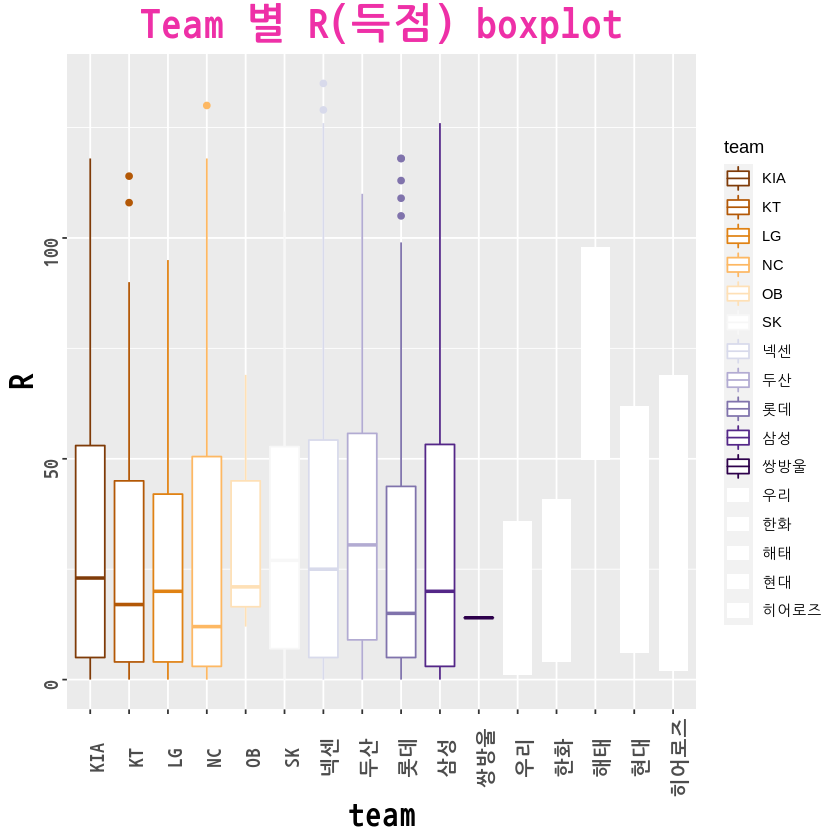

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))+
  scale_color_brewer(palette = "PuOr")

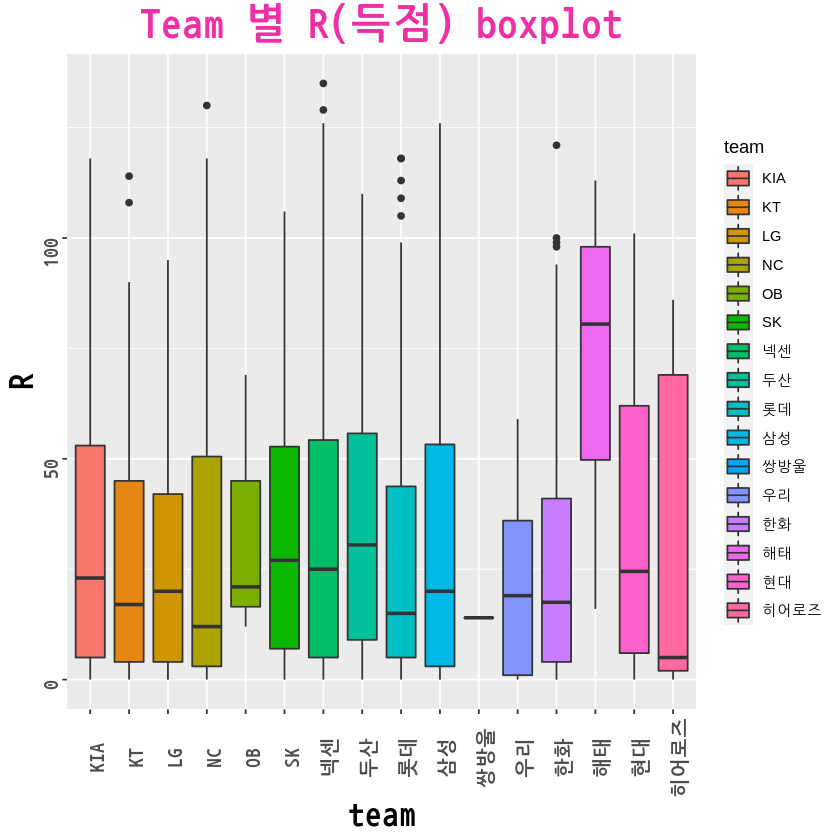

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, fill = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))

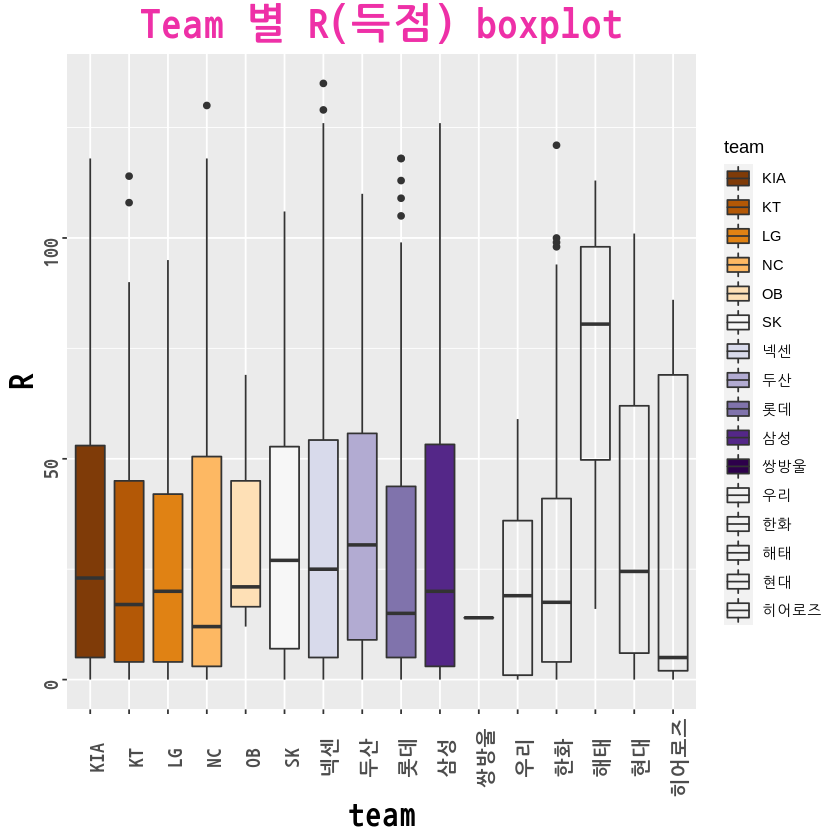

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, fill = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))+
  scale_fill_brewer(palette = "PuOr")

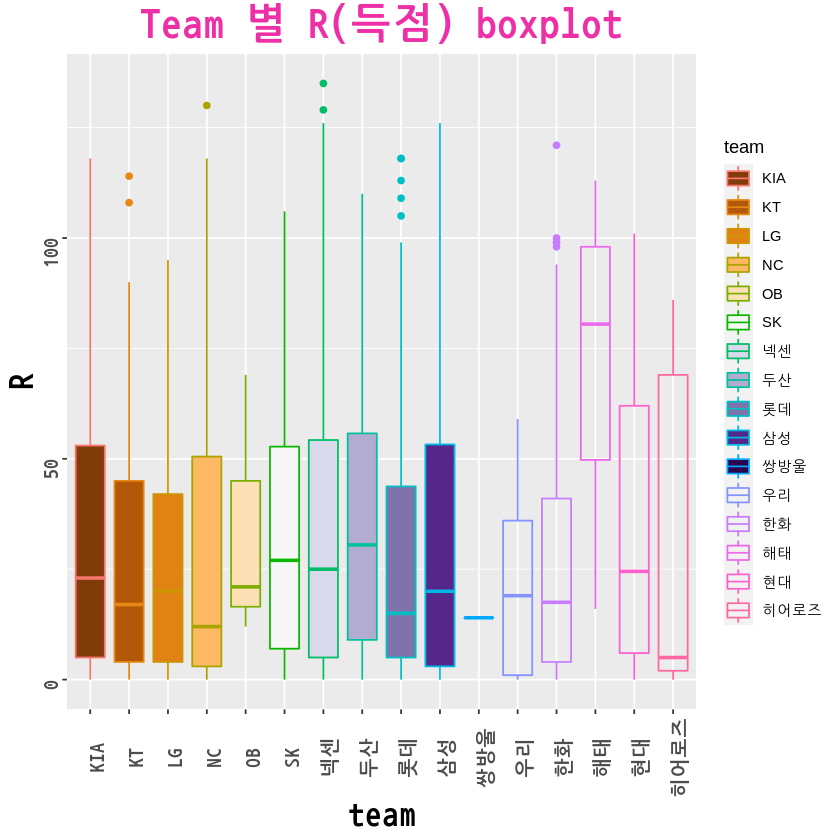

In [ ]:
# geom_boxplot
DF %>% ggplot(aes(x = team, y = R, fill = team, color = team)) + # 또는 color
 geom_boxplot() +
 ggtitle("Team 별 R(득점) boxplot") +
 theme(plot.title = element_text(family = fonts()[1], size = 25, face = "bold", color = "maroon2", hjust = 0.5), 
       axis.title.x = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.title.y = element_text(family = fonts()[1], size = 20,face = "bold"),
       axis.text.x = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"),
       axis.text.y = element_text(family = fonts()[1], size = 12, angle = 90, face = "bold"))+
  scale_fill_brewer(palette = "PuOr")